In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
# Files to Load 
joined_csv = "./clean_output/joined-ed.csv"

In [3]:
# Read the data into Pandas DataFrames 

joined_df = pd.read_csv(joined_csv)
joined_df


,county,county2,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2017,2018,2019,2020,2021,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
0,Alachua,Alachua,766,699,2454,2774,12.0,5.0,5.0,7.0,12.0,17.0,22.0,29.0,41.0
1,Baker,Baker,5,12,41,42,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
2,Bay,Bay,300,237,876,972,8.0,0.0,1.0,4.0,3.0,8.0,9.0,13.0,16.0
3,Bradford,Bradford,22,9,35,39,2.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0
4,Brevard,Brevard,1881,1657,6088,6843,26.0,5.0,5.0,16.0,17.0,31.0,36.0,52.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Volusia,Volusia,1079,903,3371,3796,22.0,4.0,8.0,14.0,9.0,26.0,34.0,48.0,57.0
64,Wakulla,Wakulla,25,21,76,90,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0
65,Walton,Walton,211,171,649,772,7.0,1.0,1.0,4.0,1.0,8.0,9.0,13.0,14.0
66,Washington,Washington,13,10,25,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [4]:
joined_df = joined_df.drop(['county2','2017', '2018','2019','2020','2021'],axis=1)
joined_df = joined_df.drop(67)
joined_df

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
0,Alachua,766,699,2454,2774,17.0,22.0,29.0,41.0
1,Baker,5,12,41,42,0.0,1.0,1.0,1.0
2,Bay,300,237,876,972,8.0,9.0,13.0,16.0
3,Bradford,22,9,35,39,2.0,2.0,2.0,2.0
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0
...,...,...,...,...,...,...,...,...,...
62,Unknown,1801,1778,6221,7489,NaN,NaN,NaN,NaN
63,Volusia,1079,903,3371,3796,26.0,34.0,48.0,57.0
64,Wakulla,25,21,76,90,0.0,0.0,0.0,4.0
65,Walton,211,171,649,772,8.0,9.0,13.0,14.0


In [5]:
#Shape of dataset
joined_df.shape

(67, 9)

In [6]:
# Info on dataset
null_data_joined = joined_df[joined_df.isna().any(axis=1)]
null_data_joined.to_csv('./clean_output/no_reg_counties.csv')
null_data_joined

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
6,Calhoun,5,5,11,14,NaN,NaN,NaN,NaN
14,Dixie,2,3,8,7,NaN,NaN,NaN,NaN
19,Gadsden,25,22,78,80,NaN,NaN,NaN,NaN
20,Gilchrist,10,13,39,38,NaN,NaN,NaN,NaN
21,Glades,5,4,21,24,NaN,NaN,NaN,NaN
24,Hardee,6,4,30,29,NaN,NaN,NaN,NaN
29,Holmes,8,6,10,10,NaN,NaN,NaN,NaN
36,Levy,23,24,82,106,NaN,NaN,NaN,NaN
37,Liberty,7,4,12,13,NaN,NaN,NaN,NaN
38,Madison,4,2,22,29,NaN,NaN,NaN,NaN


In [7]:
# Describe our dataset
joined_df.sort_values("2021_Fl_reg",ascending=False).head(45)

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations
12,Dade,9559,7936,29977,34827,162.0,223.0,312.0,435.0
5,Broward,7942,6542,23689,26767,91.0,123.0,171.0,243.0
48,Palm Beach,7943,6131,22458,25106,83.0,106.0,144.0,214.0
46,Orange,5245,4830,17617,19980,133.0,165.0,226.0,331.0
28,Hillsborough,4420,3849,14000,16110,77.0,104.0,135.0,186.0
50,Pinellas,3508,3014,10590,11760,62.0,92.0,128.0,196.0
62,Unknown,1801,1778,6221,7489,NaN,NaN,NaN,NaN
15,Duval,2059,1733,6101,6878,52.0,83.0,123.0,159.0
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0
34,Lee,1764,1463,5628,6683,26.0,32.0,39.0,55.0


In [8]:
# joined_df['2018'] = (['2018_Total_Stations'].astype(float) / joined_df['2018_Fl_reg'].astype(float))
joined_df['2018'] = (joined_df['2018_Total_Stations'] / joined_df['2018_Fl_reg'])*100
joined_df['2019'] = (joined_df['2019_Total_Stations'] / joined_df['2019_Fl_reg'])*100
joined_df['2020'] = (joined_df['2020_Total_Stations'] / joined_df['2020_Fl_reg'])*100
joined_df['2021'] = (joined_df['2021_Total_Stations'] / joined_df['2021_Fl_reg'])*100

In [9]:
joined_df.sort_values("2021_Fl_reg",ascending=False).head(45)

,county,2018_Fl_reg,2019_Fl_reg,2020_Fl_reg,2021_Fl_reg,2018_Total_Stations,2019_Total_Stations,2020_Total_Stations,2021_Total_Stations,2018,2019,2020,2021
12,Dade,9559,7936,29977,34827,162.0,223.0,312.0,435.0,1.694738,2.809980,1.040798,1.249031
5,Broward,7942,6542,23689,26767,91.0,123.0,171.0,243.0,1.145807,1.880159,0.721854,0.907834
48,Palm Beach,7943,6131,22458,25106,83.0,106.0,144.0,214.0,1.044945,1.728919,0.641197,0.852386
46,Orange,5245,4830,17617,19980,133.0,165.0,226.0,331.0,2.535748,3.416149,1.282852,1.656657
28,Hillsborough,4420,3849,14000,16110,77.0,104.0,135.0,186.0,1.742081,2.702001,0.964286,1.154562
50,Pinellas,3508,3014,10590,11760,62.0,92.0,128.0,196.0,1.767389,3.052422,1.208687,1.666667
62,Unknown,1801,1778,6221,7489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Duval,2059,1733,6101,6878,52.0,83.0,123.0,159.0,2.525498,4.789383,2.016063,2.311719
4,Brevard,1881,1657,6088,6843,31.0,36.0,52.0,69.0,1.648060,2.172601,0.854139,1.008330
34,Lee,1764,1463,5628,6683,26.0,32.0,39.0,55.0,1.473923,2.187286,0.692964,0.822984


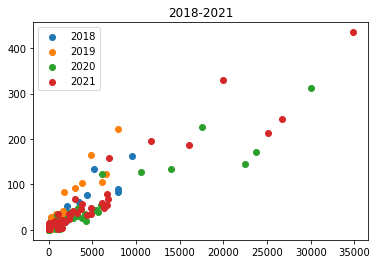

In [10]:
import matplotlib.pylab as plt
mydata = joined_df[["2018_Fl_reg", "2018_Total_Stations"]]#.dropna(how="any")
vals = mydata.values
plt.scatter(vals[:, 0], vals[:, 1],label=f'2018')
mydata2 = joined_df[["2019_Fl_reg", "2019_Total_Stations"]]#.dropna(how="any")
vals2 = mydata2.values
plt.scatter(vals2[:, 0], vals2[:, 1],label=f'2019')
mydata3 = joined_df[["2020_Fl_reg", "2020_Total_Stations"]]#.dropna(how="any")
vals3 = mydata3.values
plt.scatter(vals3[:, 0], vals3[:, 1],label=f'2020')
mydata4 = joined_df[["2021_Fl_reg", "2021_Total_Stations"]]#.dropna(how="any")
vals4 = mydata4.values
plt.scatter(vals4[:, 0], vals4[:, 1],label=f'2021')

# Plot
plt.title('2018-2021')
plt.legend()
plt.show()

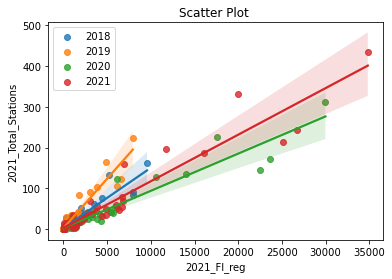

In [11]:
sns.regplot(x='2018_Fl_reg', y='2018_Total_Stations',label=f'2018', data=joined_df) 
sns.regplot(x='2019_Fl_reg', y='2019_Total_Stations',label=f'2019', data=joined_df)
sns.regplot(x='2020_Fl_reg', y='2020_Total_Stations',label=f'2020', data=joined_df)
sns.regplot(x='2021_Fl_reg', y='2021_Total_Stations',label=f'2021', data=joined_df)
plt.legend()
plt.title("Scatter Plot ");

In [69]:
joined_dft = joined_df.transpose()
joined_dft = joined_dft.drop('county')

joined_df2 = joined_dft.iloc[:,:].sum(axis=1)
joined_sum_df3 = pd.DataFrame (joined_df2, columns = ['sum'])


In [70]:
joined_sum_df3


,sum
2018_Fl_reg,67209.000000
2019_Fl_reg,56980.000000
2020_Fl_reg,209378.000000
2021_Fl_reg,238849.000000
2018_Total_Stations,1128.000000
2019_Total_Stations,1481.000000
2020_Total_Stations,2016.000000
2021_Total_Stations,2825.000000
2018,350.025566
2019,350.645834


In [12]:
# # Plot
# # "2018_Fl_reg", "2018_Total_Stations"
# # "2018_Fl_reg", "2018_Total_Stations"
# # "2018_Fl_reg", "2018_Total_Stations"
# # "2018_Fl_reg", "2018_Total_Stations"
# import numpy as np
# plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# plt.scatter(vals[:, 0], vals[:, 1], label=f'y1 Correlation = {np.round(np.corrcoef(vals[:, 0], vals[:, 1])[0,1], 2)}')
# plt.scatter(vals2[:, 0], vals2[:, 1], label=f'y1 Correlation = {np.round(np.corrcoef(vals2[:, 0], vals2[:, 1])[0,1], 2)}')
# plt.scatter(vals3[:, 0], vals3[:, 1], label=f'y2 Correlation = {np.round(np.corrcoef(vals3[:, 0], vals3[:, 1])[0,1], 2)}')
# plt.scatter(vals4[:, 0], vals4[:, 1], label=f'y3 Correlation = {np.round(np.corrcoef(vals4[:, 0], vals4[:, 1])[0,1], 2)}')

# # Plot
# plt.title('Scatterplot and Correlations')
# plt.legend()
# plt.show()

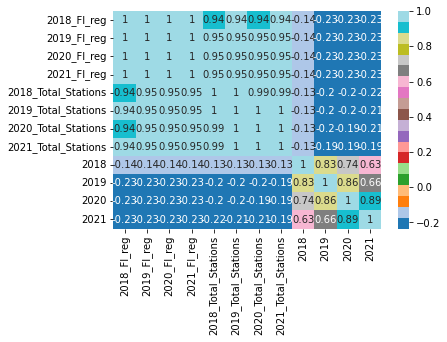

In [13]:
# Visualizing the data using heatmap
sns.heatmap(joined_df.corr(), cmap="tab20", annot = True)
plt.show()

In [ ]:
# plt.scatter( joined_df.2018_Fl_reg,joined_df.2018_Total_Stations) ##NEEDS CHANGING
# plt.xlabel('Number of EVs')
# plt.ylabel('Number of charging stations')
# plt.show()

In [ ]:
# X = df.YearsExperience.values.reshape(-1, 1) ##NEEDS CHANGING